In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [10]:
class Net(nn.Module):
    def __init__(self, in_features: int, nodes_ratio: float):
        super(Net, self).__init__()
        num_nodes = math.floor(nodes_ratio*in_features)
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, num_nodes),  # input layer
            nn.ReLU(),
            nn.Linear(num_nodes, num_nodes),    # hidden layer 1
            nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 2
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 3
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 4
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 5
#             nn.ReLU(),
            nn.Linear(num_nodes, 1)             # output layer
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = self.linear_relu_stack(X)
        return torch.sigmoid(X)

In [17]:
# kk = 0
# Kfolds = 5

# front_dir = '../data/split/outrmv-balanced/kfold'

# X_train = np.loadtxt(front_dir + f'/X_train-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# X_test = np.loadtxt(front_dir + f'/X_test-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# y_train = pd.read_csv(front_dir + f'/y_train-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)
# y_test = pd.read_csv(front_dir + f'/y_test-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)


front_dir = '../data/split/outrmv-balanced/standard'

X_train = np.loadtxt(front_dir + '/X_train.csv', delimiter=',')
X_test = np.loadtxt(front_dir + '/X_test.csv', delimiter=',')
y_train = pd.read_csv(front_dir + '/y_train.csv', index_col=0)
y_test = pd.read_csv(front_dir + '/y_test.csv', index_col=0)

y_train = y_train['class'].values
y_test = y_test['class'].values


print('---- X_train ----')
print(X_train, '\n')
print('---- X_test ----')
print(X_test, '\n')
print('---- y_train ----')
display(y_train)
print("num of HC =", len([ii for ii in y_train if ii == 0]))
print("num of PD =", len([ii for ii in y_train if ii == 1]))
print('---- y_test ----')
display(y_test)
print("num of HC =", len([ii for ii in y_test if ii == 0]))
print("num of PD =", len([ii for ii in y_test if ii == 1]))

---- X_train ----
[[ 0.       0.81014  0.71929 ...  3.11     3.3921   3.0938 ]
 [ 0.       0.46926  0.74697 ...  4.0846   7.8379  35.3807 ]
 [ 1.       0.8143   0.64398 ... 39.3016  28.786   82.6658 ]
 ...
 [ 1.       0.78144  0.8144  ... 14.692   14.5397  28.2672 ]
 [ 0.       0.8332   0.71406 ... 37.0556  27.8991  31.8286 ]
 [ 0.       0.90766  0.63802 ...  2.7332   2.7019   3.0017 ]] 

---- X_test ----
[[ 0.       0.16084  0.56499 ...  6.3042  10.9058  28.417  ]
 [ 0.       0.84627  0.61553 ...  3.7174   4.6597   5.4125 ]
 [ 0.       0.80056  0.73215 ... 10.0738  13.0857   3.8367 ]
 ...
 [ 0.       0.80654  0.56865 ...  3.5054   5.224    5.6634 ]
 [ 0.       0.80437  0.57068 ...  2.8766   2.6421   3.022  ]
 [ 0.       0.83865  0.76831 ... 14.1357  14.1944   6.2589 ]] 

---- y_train ----


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

num of HC = 446
num of PD = 446
---- y_test ----


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1])

num of HC = 112
num of PD = 112


In [18]:
%%time

num_epochs = 200
nodes_ratio = 3
learning_rate = 1e-3
lambda1 = 1e-3


net = Net(in_features=X_train.shape[1], nodes_ratio=nodes_ratio)
print(net)

criterion = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

mean_tracker = []
loss_tracker = []

print("\n- learning...")
for epoch in range(num_epochs):
    # forward propagation
    y_hat = net(torch.tensor(X_train).float())
    
    # calculate loss (without l1 regularization)
    loss = criterion(torch.tensor(y_train).reshape(len(y_train), 1).float(), y_hat)
    
    # add in the l1 regularization
    l1_reg = 0
    for param in net.parameters():
        l1_reg += torch.norm(param, 1)
    loss += lambda1*l1_reg
    
    # initialize gradients to zero
    optimizer.zero_grad()
    
    # run backprop to calculate gradients
    loss.backward()
    
    # update the model parameters
    optimizer.step()
    
#     print(f"--v-- epoch {epoch} --v--")
#     print("mean(y_hat) =", y_hat.detach().numpy().mean())
#     print("Loss =", loss)
    mean_tracker.append(y_hat.detach().numpy().mean())
    loss_tracker.append(loss.item())
print("  ...done\n")

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=366, out_features=1098, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1098, out_features=1098, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1098, out_features=1, bias=True)
  )
)

- learning...
  ...done

CPU times: user 38.6 s, sys: 1.52 s, total: 40.1 s
Wall time: 20.7 s


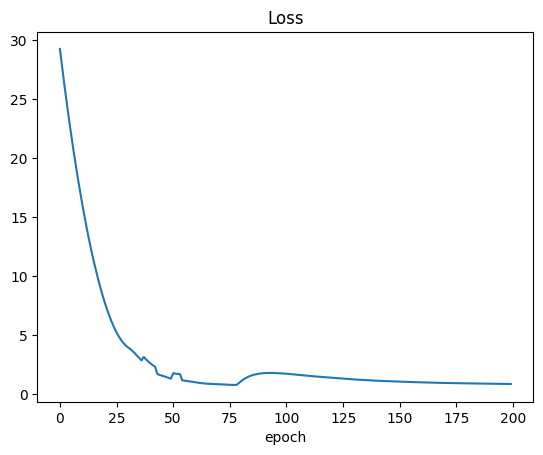

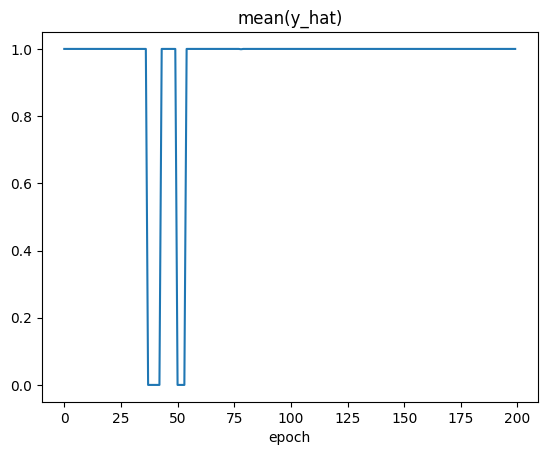

In [19]:
plt.figure()
plt.plot(np.arange(len(loss_tracker)), loss_tracker)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()
plt.close()

plt.figure()
plt.plot(np.arange(len(mean_tracker)), mean_tracker)
plt.title("mean(y_hat)")
plt.xlabel("epoch")
plt.show()
plt.close()

In [ ]:
# F- I-- N---